# Decision Trees and Random Forests with Lending Club

For this project I will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. I will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action). The csv I am using has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether or not the borrower fully paid back the loan in time.

# Import Libraries

In [12]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dexplot as dxp
sns.set_palette('coolwarm')

## Get the Data

In [13]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe().**

In [14]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [15]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [16]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization!

** First I will create a histogram of two FICO distributions on top of each other, one for each 'credit.policy' outcome.**

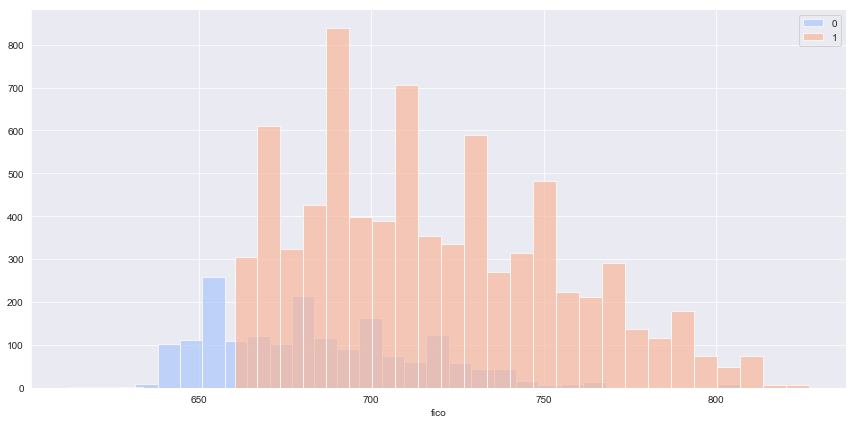

In [17]:
sns.set_style('darkgrid')
g = sns.FacetGrid(loans, hue = 'credit.policy', palette = 'coolwarm', height = 6, aspect =2)
g = g.map(plt.hist,'fico',bins=30,alpha=0.7)
plt.legend(labels = ['0', '1']);

Above, we see that the distribution of people who were approved for a loan generally had a higher credit score. Furthermore, there seems to be a loan approval cutoff poin for a FICO score below around 660, meaning applicants with credit scores below that number were never approved.

** Now a similar figure, except this time faceted by the 'not.fully.paid' column.**

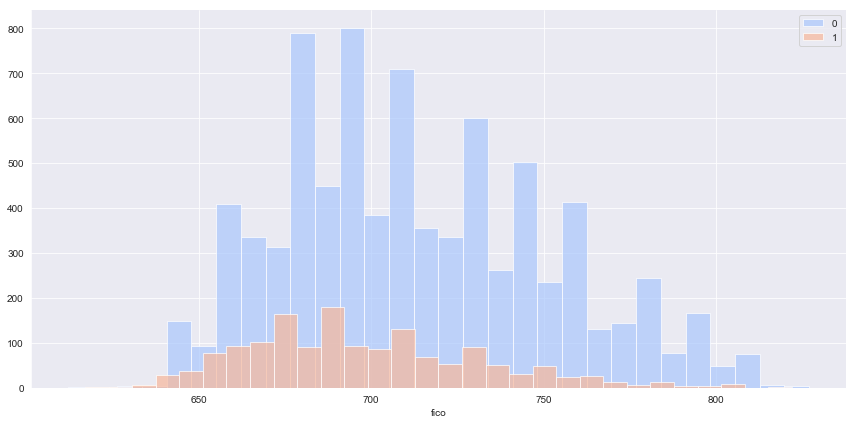

In [18]:
g = sns.FacetGrid(loans, hue = 'not.fully.paid', palette = 'coolwarm', height = 6, aspect =2)
g = g.map(plt.hist,'fico',bins=30,alpha=0.7)
plt.legend(labels = ['0', '1']);

Here, the distrubutions of those who fully paid back their loan vs those who did not overlap pretty consistently. One could argue that those who did not pay back there loan are centered at a slightly lower FICO score. 

** Now a countplot showing the counts of loans by purpose, with the color hue defined by 'not.fully.paid'. **

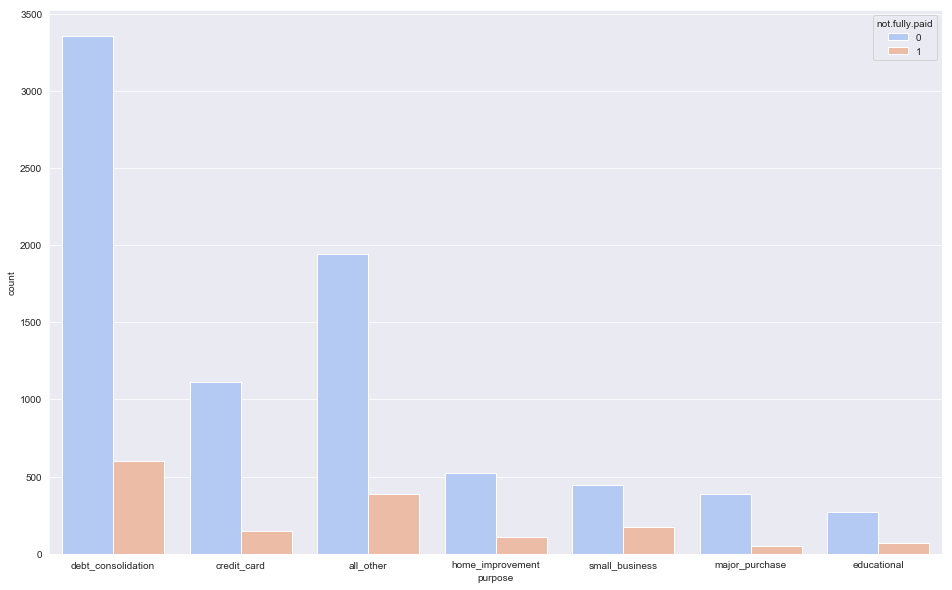

In [19]:
plt.figure(figsize = (16, 10))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loans, palette = 'coolwarm');

With this graph, it is difficult to see the relationships within each group.

** To examine these relationships more clearly, lets make a cumulative bar chart using dexplot. Important note, the graph below does not represent counts of the data. It represents the proportion of 'paid' vs 'not fully paid' for each category. **

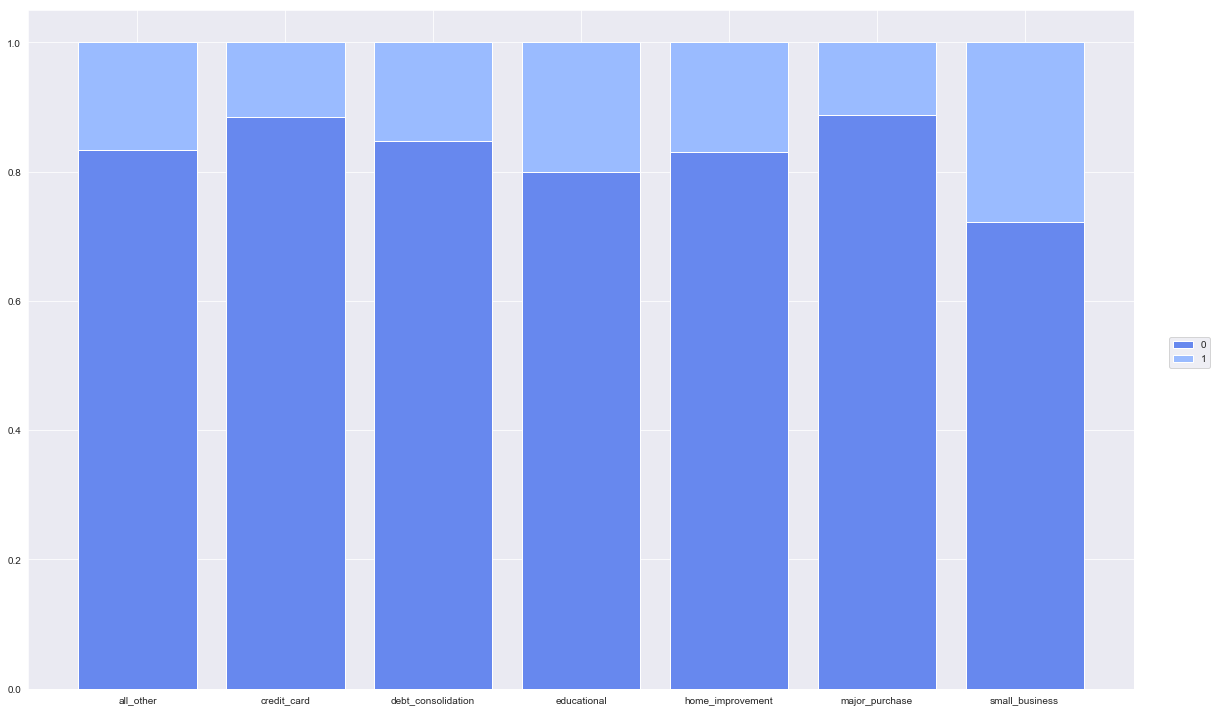

In [20]:
dxp.aggplot(agg='purpose', data=loans, hue='not.fully.paid', normalize='purpose', stacked = True, figsize = (16, 10));

Here we can see more clearly that of all the categories, 'small_business' loans have the largest percentage of not fully paying back the loan. This seems logical due to the fact that paying back the loan successfully might depend on the success of the business.

** Let's examine the trend between FICO score and interest rate.**

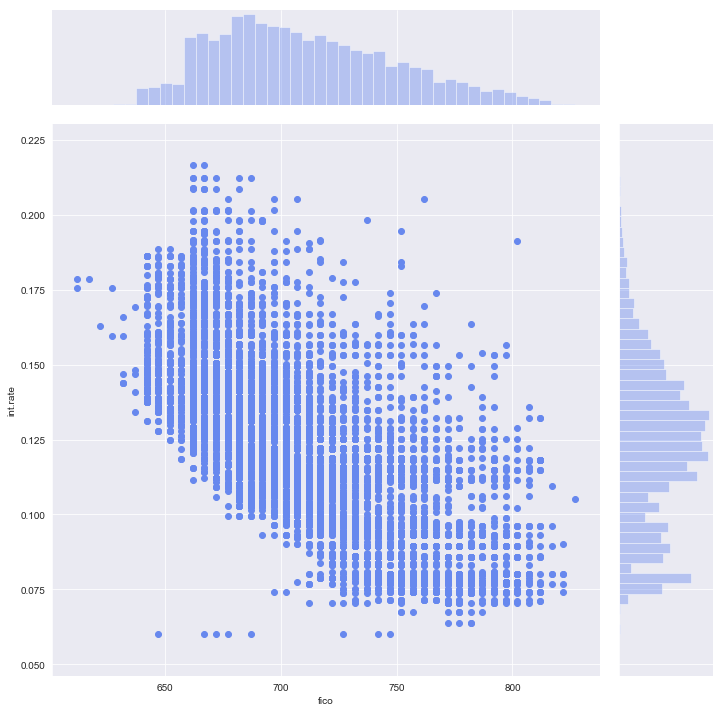

In [21]:
sns.jointplot(x = 'fico', y = 'int.rate', data = loans, height = 10);

Here we can see a clear and logical trend where a higher FICO score denotes a lower interest rate.

** Now lets examine lmplots to see if the trend differed between 'not.fully.paid' and 'credit.policy'.**

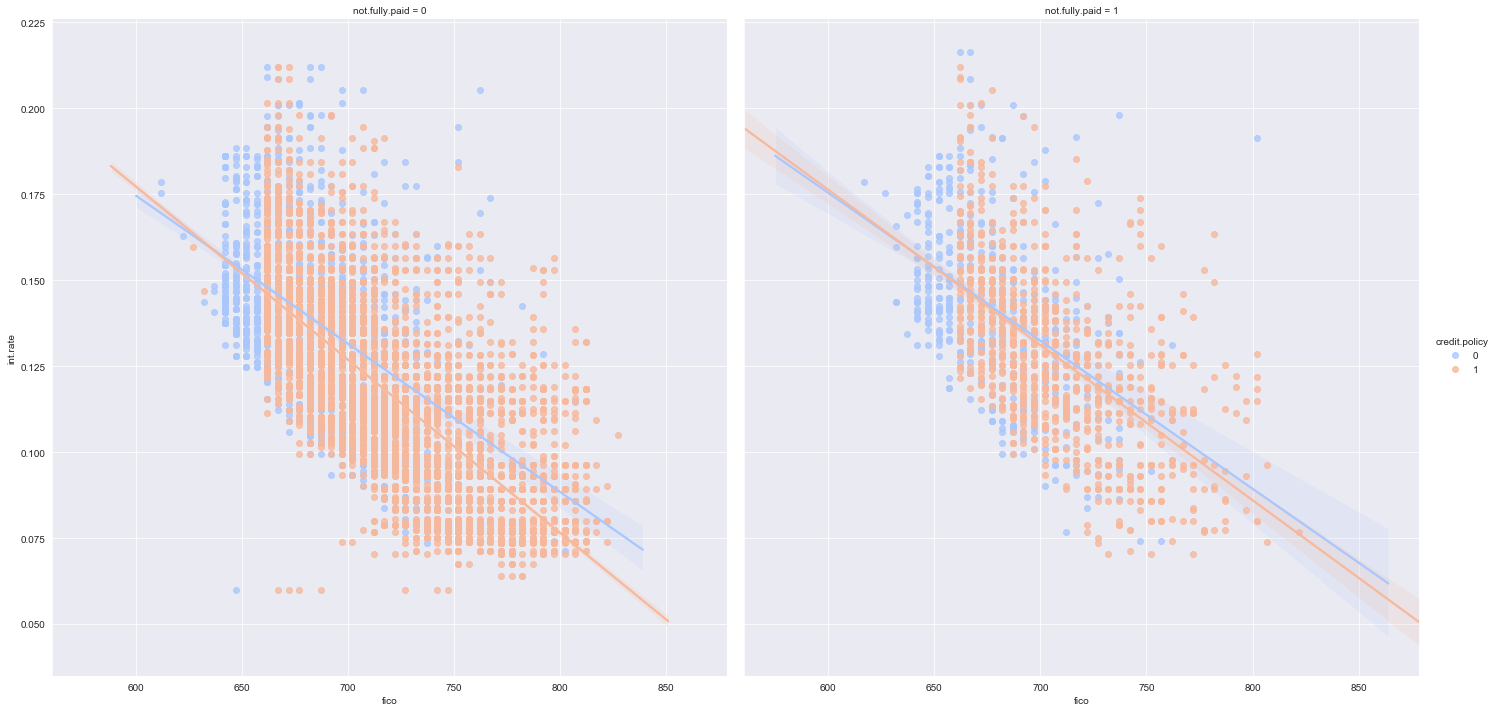

In [22]:
sns.lmplot(x = 'fico', y = 'int.rate', data = loans,hue = 'credit.policy', 
           col = 'not.fully.paid', palette='coolwarm', height = 10);

These graphs show that in the case that someone is approved who has not paid back a loan, their interest rate is higher.

# Setting up the Data

Let's set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [23]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

In [24]:
cat_feats = ['purpose']

In [25]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first= True)

## Train Test Split

Now its time to split our data into a training set and a testing set!

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = final_data.drop('credit.policy', axis = 1)
y = final_data['credit.policy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [28]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [31]:
pred = dt.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print('Confusion Matrix: \n',confusion_matrix(y_test, pred ))
print('\n')
print('Classification Report: \n',classification_report(y_test, pred))


Confusion Matrix: 
 [[ 591   16]
 [  14 2540]]


Classification Report: 
              precision    recall  f1-score   support

          0       0.98      0.97      0.98       607
          1       0.99      0.99      0.99      2554

avg / total       0.99      0.99      0.99      3161



I will save interpretation of the confusion matrix for the end; however, looking at the classification report we see an average 99% accuracy in precision recall and f1-score. With little tuning, and a relatively simple model we were able to achieve almost perfect classification prediction. Lets see if using a more complex random forest model will generate better results.

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [34]:
from sklearn.ensemble import RandomForestClassifier

/Users/nathancolbert/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
rf = RandomForestClassifier(n_estimators=100)

In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [37]:
rf_p = rf.predict(X_test)

**Now a confusion matrix and classification report from the results.**

In [39]:
print('Confusion Matrix: \n',confusion_matrix(y_test, rf_p))
print('\n')
print('Classification Report:\n',classification_report(y_test, rf_p))

Confusion Matrix: 
 [[ 577   30]
 [   5 2549]]


Classification Report:
              precision    recall  f1-score   support

          0       0.99      0.95      0.97       607
          1       0.99      1.00      0.99      2554

avg / total       0.99      0.99      0.99      3161



Again, saving the interpretation of the confusion matrix for later, looking at the classification report we again see an average accuracy of 99% across the board. 

**What performed better the random forest or the decision tree?**

Since they both performed so well, lets examine their confusion matrices to see the differences in their predictions. First lets look at the breakdown of y_test.

In [41]:
y_test.value_counts()

1    2554
0     607
Name: credit.policy, dtype: int64

This simply shows that if we were to achieve 100% accuracy in our predictions, we would classify 2554 people as 1 (approved for a loan), and 607 as a 0 (not spproved). Now lets compare our confusion matrices.

In [42]:
print('Decision Tree: \n',confusion_matrix(y_test, pred))
print('Random Forest: \n', confusion_matrix(y_test, rf_p))

Decision Tree: 
 [[ 591   16]
 [  14 2540]]
Random Forest: 
 [[ 577   30]
 [   5 2549]]


Above, we can see that the differences between the two matrices are very small. To understand whicb algorithm we may prefer, we must first understand what the confusion matrix is displaying. The top left corner refers to the number of accurately predicted 'negatives,' or 'true negatives.' In our case, this means correctly predicting that someone was not approved for a loan. The bottom right corner represents a count of the 'true positives,' meaning accurately labeled approvals. The bottom left and top right corners represent 'false negatives' and 'false positives,' respectively. This translates to incorrect labeling where we predicted someone would be approved and they were not, or vice versa.

** Now for the winner: **

My vote is for the Decision Tree. Although the random forest classified slightly more approvals correctly (true positives), the decision tree correcly predicted many more accurate disapprovals (true negatives). In this instance, a lending business would not want to miss on either mark; however, inaccurately predicting disapproval, might lead to accepting candidates who are more likely to default. Ultimately, the company will lose more money on those defaulting customers than they stand to gain from the interest of the small number of missed approvals.

## Thanks for reading!